### 교통사고 데이타셋에서 요일별 사망자수 필터링 + 시각화

(1) 요일별 사망자수 필터링 (groupby() 이용 )

(2) 요일별 사망자수의 합계 (sum() 추가)

(3) 그래프

In [2]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글깨짐처리
font_loc = "c:/Windows/Fonts/malgun.ttf"
font_name=font_manager.FontProperties(fname=font_loc).get_name()
rc('font', family=font_name)

In [3]:
# 데이타 읽어오기
data=pd.read_csv('data/accidentdata.csv')
data

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2012,2012050901,10,야간,수,1,1,0,0,0,...,단일로,기타단일로,승용차,대형,화물차,대형,1032000,1731688,127.853191,35.580719
1,2012,2012033013,32,주간,금,1,1,0,0,0,...,단일로,기타단일로,화물차,소형,특수차,경형,960392,1924378,127.052937,37.317615
2,2012,2012102620,55,야간,금,1,2,1,0,0,...,단일로,기타단일로,승용차,중형,승용차,소형,1045245,1799427,128.003224,36.190921
3,2012,2012062814,10,주간,목,1,1,0,0,0,...,단일로,기타단일로,화물차,대형,승용차,소형,992942,1915569,127.420426,37.238956
4,2012,2012061804,15,야간,월,1,1,0,0,0,...,기타/불명,기타/불명,화물차,대형,화물차,대형,1013547,1663287,127.648393,34.964371
5,2012,2012071508,4,주간,일,1,5,0,4,0,...,단일로,교량위,승합차,중형,0,0,1021668,1665087,127.727500,34.987279
6,2012,2012053104,17,야간,목,1,2,1,0,0,...,단일로,기타단일로,승용차,소형,건설기계,건설기계,971512,1953274,127.177364,37.578407
7,2012,2012091714,44,주간,월,1,1,0,0,0,...,단일로,기타단일로,승용차,대형,0,0,967198,1791822,127.135484,36.122859
8,2012,2012100102,43,야간,월,1,5,1,3,0,...,단일로,기타단일로,승용차,중형,승용차,중형,1115618,1717852,128.773999,35.449758
9,2012,2012081612,55,주간,목,1,1,0,0,0,...,단일로,기타단일로,특수차,대형,0,0,993204,1753236,127.424808,35.775498


In [78]:
# data.info()


# (1) 요일별 사망자수 필터링 (groupby() 이용 )
# (2) 요일별 사망자수의 합계 (sum() 추가)
yoil = data.groupby('요일')['사망자수'].sum()
# yoil.describe()
# yoil

# type(yoil)
yoil_data = yoil.reindex(index=['월','화','수','목','금','토','일'])
yoil_data
# yoil_data.index

# yoil_data.values

요일
월    2250
화    2258
수    2127
목    2175
금    2194
토    2290
일    1952
Name: 사망자수, dtype: int64

<IPython.core.display.Javascript object>


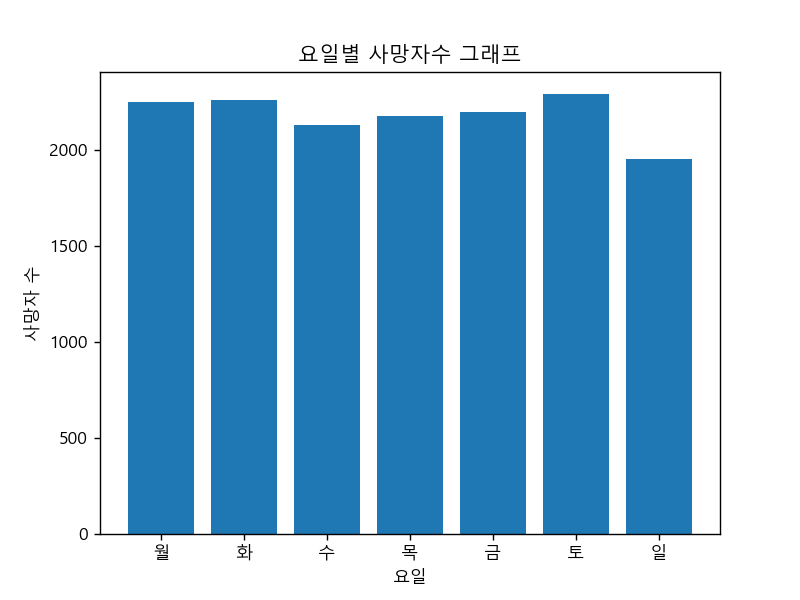

Text(0, 0.5, '사망자 수')

In [77]:
# (3) 그래프

# 막대 그래프
plt.figure()
plt.bar(yoil_data.index,yoil_data.values)
plt.title('요일별 사망자수 그래프')
plt.xlabel('요일')
plt.ylabel('사망자 수')





<IPython.core.display.Javascript object>


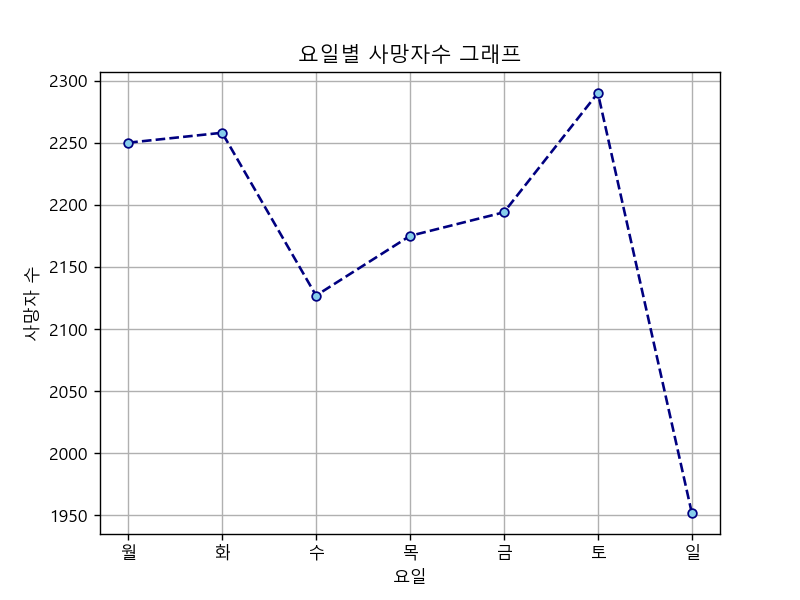

In [79]:
# 선 그래프
plt.figure()
plt.plot(yoil_data, linestyle='dashed', color='navy', marker='o',markerfacecolor='skyblue',markersize=5)
plt.title('요일별 사망자수 그래프')
plt.xlabel('요일')
plt.ylabel('사망자 수')
plt.grid()